<a href="https://colab.research.google.com/github/FrancoPalavicinoG/cellia/blob/main/notebooks/06_baseline_model_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load Train, Val & Test Datatsets from Google Drive

Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import libraries

In [2]:
# Core
import pandas as pd
import numpy as np

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, classification_report

# Explainability
import shap
import matplotlib.pyplot as plt
import seaborn as sns

Load Datasets

In [3]:
input_path = "/content/drive/MyDrive/cellia_drive/Datasets/"

Load features

In [4]:
X_train = pd.read_csv(input_path + "X_train_res.csv")
X_val   = pd.read_csv(input_path + "X_val_res.csv")
X_test  = pd.read_csv(input_path + "X_test_res.csv")

Load labels

In [5]:
y_train = pd.read_csv(input_path + "y_train_res.csv").squeeze()
y_val   = pd.read_csv(input_path + "y_val_res.csv").squeeze()
y_test  = pd.read_csv(input_path + "y_test_res.csv").squeeze()

In [6]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(897, 15) (897,)
(782, 15) (782,)
(783, 15) (783,)


### Load models

In [ ]:
import joblib

models_files = {
    "Logistic_Regression": "/content/drive/MyDrive/cellia_drive/Models/Logistic Regression.joblib",
    "Random_Forest": "/content/drive/MyDrive/cellia_drive/Models/Random Forest.joblib",
    "LightGBM": "/content/drive/MyDrive/cellia_drive/Models/LightGBM.joblib"
}

loaded_models = {name: joblib.load(path) for name, path in models_files.items()}

### Prediction Examples

In [7]:
for name, model in loaded_models.items():
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred))


=== Logistic_Regression ===
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       706
           1       0.26      0.78      0.39        77

    accuracy                           0.76       783
   macro avg       0.62      0.77      0.62       783
weighted avg       0.90      0.76      0.81       783


=== Random_Forest ===
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       706
           1       0.27      0.73      0.40        77

    accuracy                           0.78       783
   macro avg       0.62      0.76      0.63       783
weighted avg       0.90      0.78      0.82       783


=== LightGBM ===
              precision    recall  f1-score   support

           0       0.96      0.77      0.85       706
           1       0.25      0.70      0.37        77

    accuracy                           0.76       783
   macro avg       0.60      0.74      0.61       783
weig

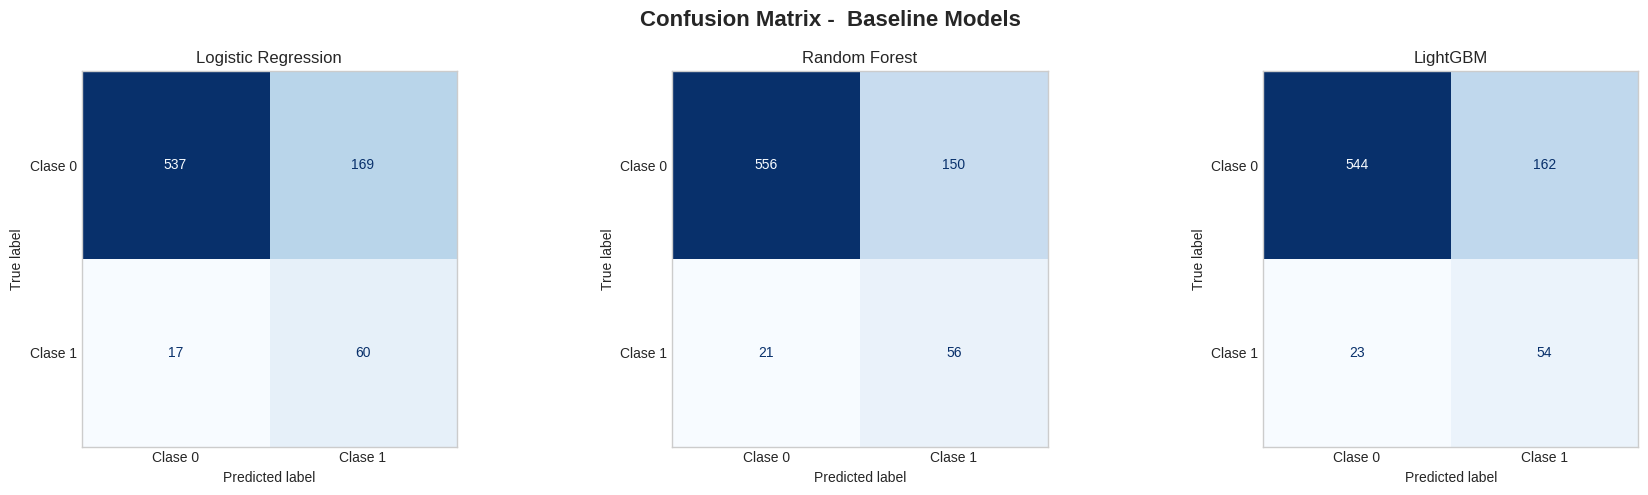

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Configurar estilo
plt.style.use("seaborn-v0_8-whitegrid")

models = {
    "Logistic Regression": loaded_models["Logistic_Regression"],
    "Random Forest": loaded_models["Random_Forest"],
    "LightGBM": loaded_models["LightGBM"]
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Clase 0", "Clase 1"])
    disp.plot(ax=ax, cmap="Blues", colorbar=False)
    ax.set_title(name)
    ax.grid(False)

plt.suptitle("Confusion Matrix -  Baseline Models", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()